In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('cleaned.csv')

In [2]:
df.head()

,Unnamed: 0,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,...,elev,cohesion,slide,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt
0,2,3,265.2971,644.9806,65600,1,-2.156464,0.636057,-1.520407,0.214373,...,1057.005,10,1,28.28427,0.0,23,15.34650,2024.026,1,19
1,3,4,267.3936,647.7654,65600,1,2.616730,-2.301352,0.315377,0.135763,...,1065.420,10,1,20.00000,0.0,23,12.92921,2015.106,1,19
2,6,7,272.0991,625.1400,65600,1,0.029022,-0.073801,-0.044779,0.164955,...,1058.138,10,1,20.00000,0.0,23,16.34302,1985.669,1,19
3,7,8,272.9689,628.0128,65600,1,-1.793457,0.881960,-0.911497,0.215654,...,1063.369,10,1,20.00000,0.0,23,16.76664,1976.543,1,19
4,8,9,261.2346,631.5062,65600,1,2.723572,-2.240553,0.483019,0.142164,...,1072.220,10,1,20.00000,0.0,23,13.31464,1968.201,1,19


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df = df.drop('ID', axis=1)
df = df.drop('basin', axis=1)
df = df.drop('rockdist', axis=1)

In [5]:
df.columns

Index(['aspect', 'strdist', 'basarea', 'curvature', 'curve_cont', 'curve_prof',
       'curves', 'drop', 'flowdir', 'fos', 'lith', 'elev', 'cohesion', 'slide',
       'scarpdist', 'scarps', 'frictang', 'slope', 'slopeleg', 'woods',
       'specwt'],
      dtype='object')

In [6]:
len(list(df.columns))

21

In [7]:
X = df.drop('slide', axis=1)
y = df['slide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

In [9]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"{name} Model:")
    print(f"Validation Accuracy: {accuracy*100:.4f}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

Random Forest Model:
Validation Accuracy: 92.9481
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4068
           1       0.89      0.90      0.90      2058

    accuracy                           0.93      6126
   macro avg       0.92      0.92      0.92      6126
weighted avg       0.93      0.93      0.93      6126

[11:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Owner\anaconda3\envs\landslide_prediction\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost Model:
Validation Accuracy: 92.7685
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4068
           1       0.89      0.90      0.89      2058

    accuracy                           0.93      6126
   macro avg       0.92      0.92      0.92      6126
weighted avg       0.93      0.93      0.93      6126

Decision Tree Model:
Validation Accuracy: 88.4427
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4068
           1       0.83      0.83      0.83      2058

    accuracy                           0.88      6126
   macro avg       0.87      0.87      0.87      6126
weighted avg       0.88      0.88      0.88      6126

Logistic Regression Model:
Validation Accuracy: 66.9278
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      4068
           1      

In [10]:
for name, model in models.items():
    y_pred_test = model.predict(X_test)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    classification_rep_test = classification_report(y_test, y_pred_test)

    print(f"{name} Model (Test Set):")
    print(f"Test Accuracy: {accuracy_test*100:.4f}")
    print("Test Classification Report:")
    print(classification_rep_test)
    print("="*50)

Random Forest Model (Test Set):
Test Accuracy: 92.9481
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4068
           1       0.89      0.90      0.90      2058

    accuracy                           0.93      6126
   macro avg       0.92      0.92      0.92      6126
weighted avg       0.93      0.93      0.93      6126

XGBoost Model (Test Set):
Test Accuracy: 92.7685
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4068
           1       0.89      0.90      0.89      2058

    accuracy                           0.93      6126
   macro avg       0.92      0.92      0.92      6126
weighted avg       0.93      0.93      0.93      6126

Decision Tree Model (Test Set):
Test Accuracy: 88.4427
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     

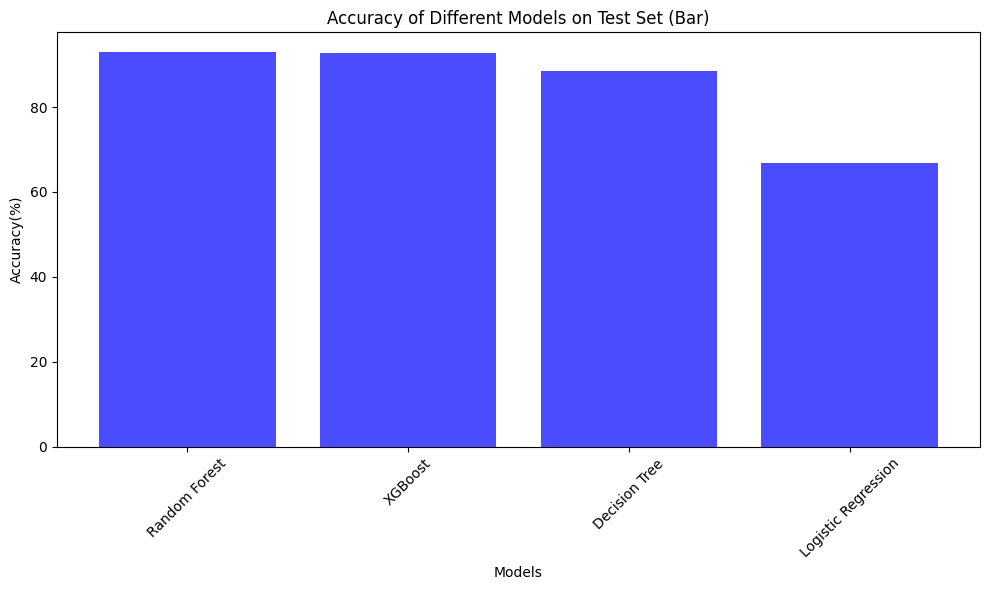

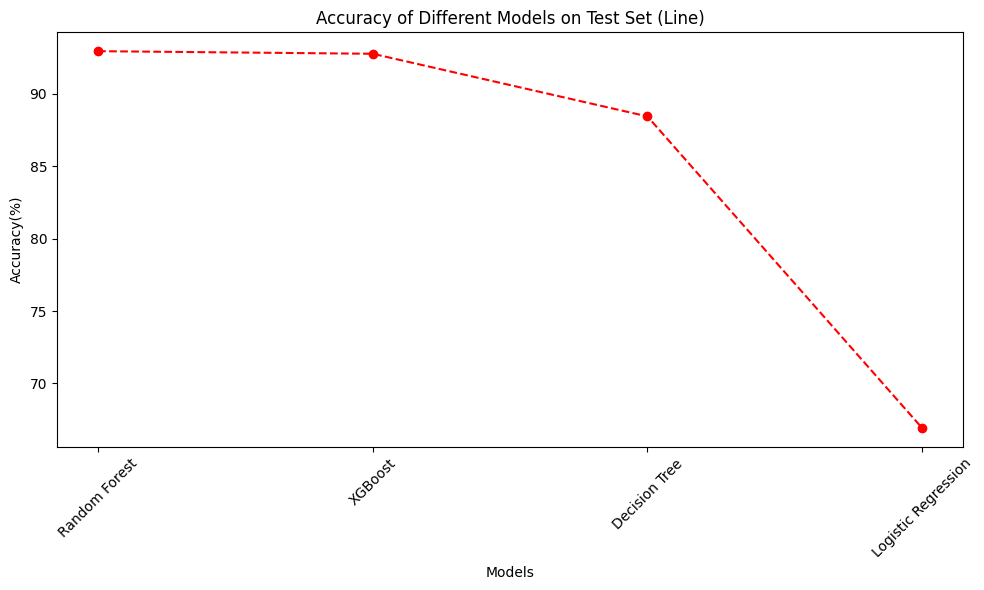

In [11]:
import matplotlib.pyplot as plt

# Initialize lists to store model names and accuracy values
model_names = []
accuracy_values = []

for name, model in models.items():
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)*100
    
    # Append model name and accuracy value to the respective lists
    model_names.append(name)
    accuracy_values.append(accuracy_test)

# Plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='b', alpha=0.7)

# Add labels and title for bar graph
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of Different Models on Test Set (Bar)')
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Plotting line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_values, color='r', marker='o', linestyle='--')

# Add labels and title for line graph
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of Different Models on Test Set (Line)')
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [12]:
import pickle

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

with open('xgb_model.pkl', 'rb') as model_file:
    loaded_xgb_model = pickle.load(model_file)

y_pred_test_xgb = loaded_xgb_model.predict(X_test)

accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
classification_rep_test_xgb = classification_report(y_test, y_pred_test_xgb)

print("XGBoost Model (Test Set):")
print(f"Test Accuracy: {accuracy_test_xgb:.4f}")
print("Test Classification Report:")
print(classification_rep_test_xgb)


C:\Users\Owner\anaconda3\envs\landslide_prediction\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model (Test Set):
Test Accuracy: 0.9277
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4068
           1       0.89      0.90      0.89      2058

    accuracy                           0.93      6126
   macro avg       0.92      0.92      0.92      6126
weighted avg       0.93      0.93      0.93      6126



In [13]:
import pickle

with open('xgb_model.pkl', 'rb') as model_file:
    loaded_xgb_model = pickle.load(model_file)


def landslide_fn(features_list):
                int_features2 = np.array(features_list)
                int_features1 = int_features2.reshape(1, -1)
                tested1=loaded_xgb_model.predict(int_features1)
                print(tested1)
                return  tested1

In [14]:
landslide_fn([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

[1]


array([1], dtype=int64)